In [1]:
from coders import FeatureFSK as Coder, BitStream
from coders.pipeline import Pipeline
from coders.ga import Population
import warnings
warnings.filterwarnings('ignore')

pipeline = Pipeline('.', no_lock=False)

gen_iter = 30
gen_time = 600

[22024] Lock acquired: 1


In [2]:
def coder_fitness(cutoff=0.95, size=300):
    def fn(coder, raw=False):
        input_source = BitStream(np.random.randint(2, size=size))
        r, q = pipeline.test(coder, input_source)
        if q < cutoff:
            r = 0
        if raw:
            return r, q
        return r * q ** 5
    return fn

In [3]:
population = Population(Coder, coder_fitness(0), 20, 0.2, 0.1)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.70)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.90)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.95)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)
population.fn = coder_fitness(0.98)
population.evolve(10000, max_iter=gen_iter, max_time=gen_time)

Gen 1 grades: 365/252/127
Gen average time: 0:00:06.208362
Gen 2 grades: 601/446/254
Gen average time: 0:00:05.307426
Gen 3 grades: 693/546/307
Gen average time: 0:00:04.718397
Gen 4 grades: 639/571/392
Gen average time: 0:00:04.333322
Gen 5 grades: 601/510/374
Gen average time: 0:00:04.088855
Gen 6 grades: 639/582/414
Gen average time: 0:00:03.503744
Gen 7 grades: 639/609/433
Gen average time: 0:00:03.260587
Gen 8 grades: 1485/880/478
Gen average time: 0:00:03.245980
Gen 9 grades: 966/823/508
Gen average time: 0:00:03.367815
Gen 10 grades: 1240/1092/536
Gen average time: 0:00:03.449970
Gen 11 grades: 1485/1202/745
Gen average time: 0:00:03.436808
Gen 12 grades: 1575/1114/730
Gen average time: 0:00:03.453819
Gen 13 grades: 1358/1095/713
Gen average time: 0:00:03.371738
Gen 14 grades: 1318/1051/709
Gen average time: 0:00:03.216248
Gen 15 grades: 1167/1019/667
Gen average time: 0:00:03.151885
Gen 16 grades: 1358/1174/804
Gen average time: 0:00:03.168046
Gen 17 grades: 1202/876/513
Gen av

In [4]:
sg = np.array([sorted(grades, reverse=True) for grades in population.grades])
top75 = sg[:, :3 * population.size // 4].mean(axis=1)
top25 = sg[:, :population.size // 4].mean(axis=1)
top1 = sg[:, :1].mean(axis=1)

out/FeatureFSK_GA_2892917518968.pdf


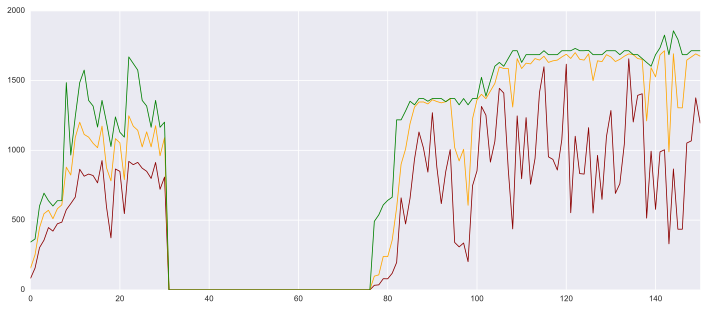

In [5]:
f = 'out/{}_GA_{}.pdf'.format(Coder.__name__, id(pipeline))
sns.tsplot(top75, color='darkred')
sns.tsplot(top25, color='orange')
sns.tsplot(top1, color='green')
print(f)
plt.savefig(f, bbox_inches='tight', pad_inches=0)
plt.show()

In [6]:
for c in population._sort(10000):
    print(c)

FeatureFSK:
    symbol_width: 1
    peak_threshold: 0.123174874645953
    sqe_start: 0.3213863459673413
    filter_std_scale: 0.1802648783103909
    sqe_end_v: 0.24444245338232404
    peak_width_start: 0.2156207136349749
    peak_width_span: 0.5101807322989788
    sqe_start_v: 0.8012945816614772
    frequency_dev: 0.2968313334367931
    filter_type: 0
    symbol_duration: 0.0005859594869577588
    filter_window_base: 29
    filter_shape: 0.98663635215786
    amplitude: 0.8005398383105882
    filter_std_base: 24
    filter_window_scale: 0.4277891650141099
    frequency: 2592
    rate: 96000
    sqe_end: 0.0823434711580116
FeatureFSK:
    symbol_width: 1
    peak_threshold: 0.11970632532463804
    sqe_start: 0.3198783734680434
    filter_std_scale: 0.17160279489400426
    sqe_end_v: 0.18470298319950706
    peak_width_start: 0.2156207136349749
    peak_width_span: 0.6051686229734616
    sqe_start_v: 0.7253282496098324
    frequency_dev: 0.22686845951677487
    filter_type: 0
    symbol_du

In [9]:
for c in population._sort(10000)[:3]:
    print(*coder_fitness(0, 3000)(c, raw=True))
    print(c)

1714.2857142857142 0.9946666666666667
FeatureFSK:
    symbol_width: 1
    peak_threshold: 0.123174874645953
    sqe_start: 0.3213863459673413
    filter_std_scale: 0.1802648783103909
    sqe_end_v: 0.24444245338232404
    peak_width_start: 0.2156207136349749
    peak_width_span: 0.5101807322989788
    sqe_start_v: 0.8012945816614772
    frequency_dev: 0.2968313334367931
    filter_type: 0
    symbol_duration: 0.0005859594869577588
    filter_window_base: 29
    filter_shape: 0.98663635215786
    amplitude: 0.8005398383105882
    filter_std_base: 24
    filter_window_scale: 0.4277891650141099
    frequency: 2592
    rate: 96000
    sqe_end: 0.0823434711580116
1714.2857142857142 0.9973333333333333
FeatureFSK:
    symbol_width: 1
    peak_threshold: 0.11970632532463804
    sqe_start: 0.3198783734680434
    filter_std_scale: 0.17160279489400426
    sqe_end_v: 0.18470298319950706
    peak_width_start: 0.2156207136349749
    peak_width_span: 0.6051686229734616
    sqe_start_v: 0.725328249609